In [10]:
import lightkurve as lk

In [11]:
'''
Target Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star.

TPFs can be thought of as stacks of images, with one image for every timestamp the telescope took data. Each timestamp is referred to as a cadence. 
These images are cut out "postage stamps" of the full observation to make them easier to work with.

TPFs are given in FITS files, LightKurve includes tools that allow us to directly work with these files.
'''

'\nTarget Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain movies of the pixel data centered on a single target star.\n\nTPFs can be thought of as stacks of images, with one image for every timestamp the telescope took data. Each timestamp is referred to as a cadence. \nThese images are cut out "postage stamps" of the full observation to make them easier to work with.\n\nTPFs are given in FITS files, LightKurve includes tools that allow us to directly work with these files.\n'

In [12]:
'''
To load a KeplerTargetPixelFile from a local path or remote url, simply call Lightkurves read function using the location of the file as the parameter:
'''

#tpf is an object of type target_pixle_file, this object contains easy accsess metadata (mission title, quarter...) accsessed with the .meta() function.
tpf = lk.read("https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz")

In [26]:
'''
"Because this is an AstroPy Time object, you access to human-readable ISO timestamps using the time.iso property:"
ISO timestampoing refers to an internationally agreed upon time standard date hour:minute:second:millisecond

Note: these timestamps are in Solar Barycentric frame (TDB) and do not account for light travel time/leap seconds.
'''

print("TDB: ")
print(tpf.time.iso)

'''
we can also use some separate attributes to return another time format such as Earth Centered UTC system:
'''

print("UTC: ")
print(tpf.time.utc)

TDB: 
['2009-12-19 21:01:54.467' '2009-12-19 21:31:19.895'
 '2009-12-19 22:30:10.752' ... '2010-03-19 15:54:11.704'
 '2010-03-19 16:23:37.233' '2010-03-19 16:53:02.754']
UTC: 
[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]


In [27]:
''' 
we can accsess image data via the tpf flux attribute:
the returned info indicates our frames are 4116x5x5, 5x5 pixles (see following cell) and 4116 refers to the time axis. 
units of flux are given in electrons/second
'''
tpf.flux.shape

(4116, 5, 5)

<Axes: title={'center': 'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

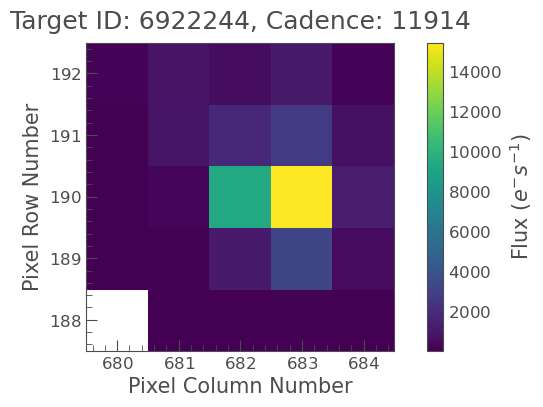

In [33]:
'''
the target pixle file object is a collection of said timestamps over a given time frame ("movies of pixle data")
all properties can be found in the API documentation for the tpf object
'''

#here we take a look at frame zero of the tpf object. 
#TODO: why is the zeroth frame labeled as  cadence: 11914 
%matplotlib inline
tpf.plot(frame=0)

In [31]:
'''
we can accsess the flux values in an individual tpf exposure the same way we would accsess values in a 2d array:
output is given in values of electrons/second, 25 values, one corresponding to each pixle in the 5x5 frame.
typical numpy methods can be used to manipulate/extract information from this array 
'''
tpf.flux[0]

<Quantity [[          nan, 5.6079335e+00, 5.1491142e+01, 8.4241745e+01,
            3.0221334e+01],
           [4.4045620e+01, 7.6861229e+01, 1.1227759e+03, 3.2262029e+03,
            4.5486777e+02],
           [2.5911165e+01, 2.2907593e+02, 9.3626543e+03, 2.3606273e+04,
            1.2087750e+03],
           [4.0100830e+01, 8.8543927e+02, 1.7102118e+03, 2.6254871e+03,
            7.0796606e+02],
           [1.5719417e+02, 8.3713440e+02, 5.1021539e+02, 1.1501041e+03,
            1.8313370e+02]] electron / s>

[[False False False False False]
 [False False  True  True False]
 [False False  True  True False]
 [False  True  True  True False]
 [False False False  True False]]


<Axes: title={'center': 'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

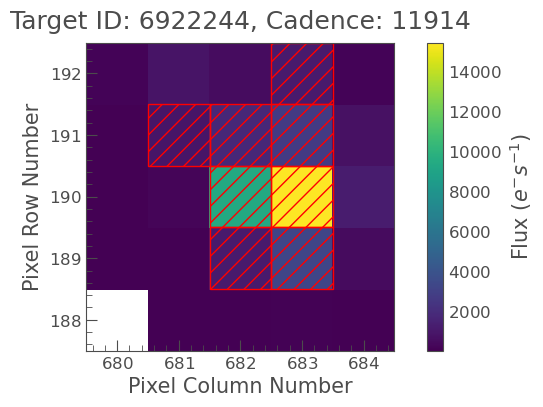

In [35]:
'''
we can turn this tpf  into a lightkuve (one flux point/time stamp)
- each pixle is 4 arc seconds across
- point spread function (psf) of the telescope results in a spread of flux across pixels
- we therefor must sum flux from each pixel that contibutes (determined by boolean aperture mask) to deterimine total light from source
- first we print the boolean array, then we apply the mask to the initial tpf plot:
'''

print(tpf.pipeline_mask)

tpf.plot(aperture_mask=tpf.pipeline_mask)

In [37]:
'''
various metadata associated with the fits file can be accsessed by means of the get_header function.
here we print the first ten lines:
'''
tpf.get_header()[:10]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 